<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Plot-results" data-toc-modified-id="Plot-results-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Plot results</a></span></li></ul></div>

In [59]:
import glob
import numpy as np
import matplotlib.pyplot as plt

## Plot results



In [173]:
def plot_exp(exp):
    # load the vars from exp
    temps, N, therm_sweeps, measure_sweeps =  [exp[x] for x in
        ['temps', 'N', 'therm_sweeps', 'measure_sweeps']
    ]
    energies, heat, magn, susc = [exp[x] for x in
        ['energies', 'heat', 'magn', 'susc']
    ]
    
    fig, axs = plt.subplots(1,2, figsize=(10,4))

    fig.suptitle(
        ('Ising with conv3d.\n'
         f'{N=}, {therm_sweeps=}, {measure_sweeps=}\n '
        )
        #, y=1.00
        , fontsize=13
    )

    plt.sca(axs[0])
    plt.errorbar(temps, energies/N**2
                 , yerr=heat/N**2
                 , capsize=2
                )
    plt.gca().twinx()
    plt.plot(temps, heat/temps, 'red', label='Specific heat')
    plt.legend(loc='best')

    plt.sca(axs[1])
    #plt.plot(temps, magnetizations/N**2)
    plt.errorbar(temps, magn/N**2
                 , yerr=susc/N**2
                 , capsize=2
                )
    plt.gca().twinx()
    plt.plot(temps, susc/temps/N**2, 'red', label='M. Susceptibility')

    plt.legend(loc='best')

    [ax.grid() for ax in axs]
    [ax.set_title(x) for ax,x in zip(axs, ['Energy', 'Magnetization'])]
    [ax.set_xlabel('kT') for ax in axs]
    plt.subplots_adjust(top=0.80)
    return fig, axs


In [169]:
files = glob.glob('../data/exp*')
files = sorted(files)
list(enumerate(files))

[(0, '../data/exp_3d_N20_sweep700_mu0.0_temps.npy'),
 (1, '../data/exp_3d_N40_sweep1500_mu0.0_temps.npy'),
 (2, '../data/exp_3d_N50_sweep10000_mu0.0_temps.npy'),
 (3, '../data/exp_N100_sweep1500.npy'),
 (4, '../data/exp_N100_sweep2000.npy'),
 (5, '../data/exp_N100_sweep3500.npy'),
 (6, '../data/exp_N100_sweep600.npy'),
 (7, '../data/exp_N100_sweep800.npy'),
 (8, '../data/exp_N200_sweep10000.npy'),
 (9, '../data/exp_N20_sweep500_mu0.0_temps.npy'),
 (10, '../data/exp_N20_sweep600.npy'),
 (11, '../data/exp_N30_sweep1000_mu0.0_temps_anisotrop0.95.npy'),
 (12, '../data/exp_N30_sweep1000_mu0.0_temps_diag.npy'),
 (13, '../data/exp_N30_sweep600_mu0.0_temps_anisotrop0.95.npy'),
 (14, '../data/exp_N400_sweep10000.npy'),
 (15, '../data/exp_N400_sweep3500.npy'),
 (16, '../data/exp_N50_sweep1000_mu0.0_temps.npy'),
 (17, '../data/exp_N50_sweep1000_mu0.0_temps2_diag.npy'),
 (18, '../data/exp_N50_sweep1000_mu0.0_temps_anisotr.98.npy'),
 (19, '../data/exp_N50_sweep1000_mu0.0_temps_diag.npy'),
 (20, '..

In [246]:
filename = files[2]
exp = np.load(filename, allow_pickle=True)
exp = exp.item()

In [247]:
exp['energies'] = np.mean(exp['energies'], axis = 1)[10:]
#exp['magn'] = np.mean(exp['magn'], axis = 1)
exp['heat'] = np.mean(exp['heat'], axis = 1)[10:]
exp['temps'] = exp['temps'][10:]
exp['magn'] = exp['magn'][10:]
exp['susc'] = exp['susc'][10:]

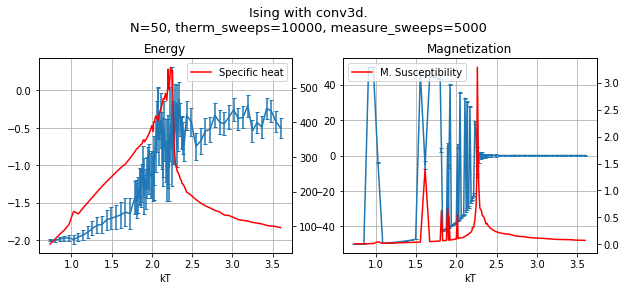

In [248]:
fig, axs = plot_exp(exp)
N = exp['N']
sweeps = exp['therm_sweeps']
#fig.suptitle('3D '+fig._suptitle.get_text())

In [196]:
fig.savefig(f'../data/figures/Ising_conv3d_N{N}_{sweeps}sweeps.png')

In [249]:
temps, energies, heat, magn, susc = [exp[x] for x in
    ['temps', 'energies', 'heat', 'magn', 'susc']
]
heat = heat/temps
susc = susc/temps


In [250]:
def to_reduced_temps(temps, t_c):
    red_temps = (temps - t_c)/t_c
    return red_temps 

def estimate_t_c(temps, x):
    t_c = temps[np.argmax(x)]
    return t_c

tc_heat = estimate_t_c(temps[20:], heat[20:])
tc_susc = estimate_t_c(temps, susc)
tc_theory = 2.269*exp['J']

print(f'Heat tc: {tc_heat}')
print(f'Susc tc: {tc_susc}')
print('Theory T_c', tc_theory)
tc_theory=tc_susc

Heat tc: 2.230769230769231
Susc tc: 2.2615384615384615
Theory T_c 1.1345


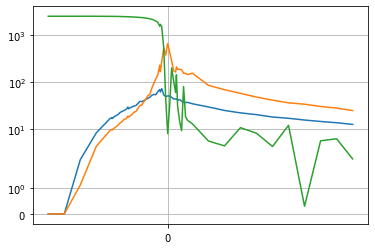

In [244]:
red_t = to_reduced_temps(temps, tc_theory)

plt.plot(red_t, np.abs(heat))
plt.plot(red_t, np.abs(susc))
plt.plot(red_t, np.abs(magn))
plt.yscale('symlog')
plt.xscale('symlog')
plt.grid()



<ipython-input-245-cef4625e9845>:1: RuntimeWarning: divide by zero encountered in log
  df_h = np.log(np.abs(heat))/np.log(np.abs(red_t))
<ipython-input-245-cef4625e9845>:2: RuntimeWarning: divide by zero encountered in log
  df_s = np.log(np.abs(susc))/np.log(np.abs(red_t))


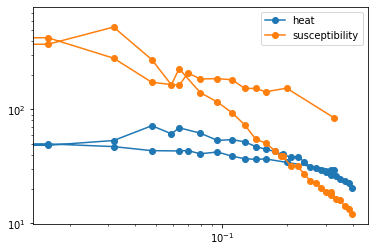

In [245]:
df_h = np.log(np.abs(heat))/np.log(np.abs(red_t))
df_s = np.log(np.abs(susc))/np.log(np.abs(red_t))

around_tc = np.abs(red_t)<.4
df_h_crit = df_h[around_tc]
df_s_crit = df_s[around_tc]
red_t_crit = red_t[around_tc]
plt.plot(abs(red_t_crit), heat[around_tc], 'o-', label='heat')
plt.plot(abs(red_t_crit), susc[around_tc], 'o-', label='susceptibility')
plt.yscale('log')
plt.xscale('log')
plt.legend()

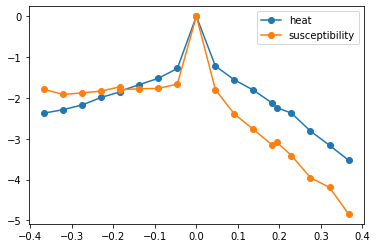

In [229]:
plt.plot(red_t_crit, df_h_crit, 'o-', label='heat')
plt.plot(red_t_crit, df_s_crit, 'o-', label='susceptibility')
plt.legend()

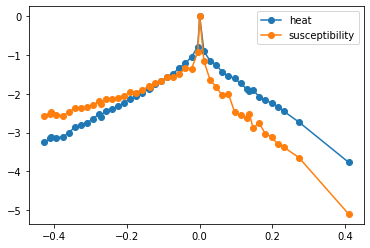

In [161]:
plt.plot(red_t_crit, df_h_crit, 'o-', label='heat')
plt.plot(red_t_crit, df_s_crit, 'o-', label='susceptibility')
plt.legend()

In [66]:
sorted(zip(red_t_crit, df_s_crit), key=lambda x: abs(x[0]))

[(-0.002527410258947255, -1.344531623501708),
 (0.007366366555436518, -1.5096926236489845),
 (-0.012421187073330833, -1.47158803103695),
 (0.01726014336982029, -2.0229845267732673),
 (-0.022314963887714607, -1.9085967802444113),
 (-0.0224994632222484, -1.6439275462825549),
 (0.027153920184204063, -2.2790346126873278),
 (-0.03220874070209838, -1.8458323340748997),
 (0.037047696998587835, -2.2340802666944044),
 (-0.04210251751648215, -2.4075135677177686),
 (0.044173983794962346, -2.3991953828392063),
 (0.04694147381297161, -2.5898038104456895),
 (-0.05199629433086592, -2.014700917358243),
 (0.05683525062735538, -2.6168304527368744),
 (-0.0618900711452497, -2.0655194855264796),
 (0.06672902744173916, -2.763155080668593),
 (-0.07178384795963347, -2.125144283232172),
 (0.07662280425612293, -2.783663777262577),
 (-0.08167762477401724, -2.195728693929598),
 (0.0865165810705067, -2.9987316059858853),
 (-0.08917291023945934, -2.518024735556241),
 (-0.09157140158840082, -2.2801451377936814),
 (0